# 05_2.Independent Sample t-test(연습문제)
- https://pingouin-stats.org/build/html/generated/pingouin.ttest.html#pingouin.ttest

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
ist_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/05_2.Education.csv', encoding="cp949")
ist_df.head()

,번호,구분,종합점수
0,1,1,80.0
1,2,1,70.0
2,3,1,80.0
3,4,1,70.0
4,5,1,56.6


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변종합점수 구분이 쉬움

In [4]:
ist_df['구분'].replace({1:'재학생', 2:'교원',}, inplace=True)
ist_df['구분'] = ist_df['구분'].astype('category')

ist_df.head()

,번호,구분,종합점수
0,1,재학생,80.0
1,2,재학생,70.0
2,3,재학생,80.0
3,4,재학생,70.0
4,5,재학생,56.6


### 2.3 자료구조 살펴보기

In [5]:
ist_df.shape

(100, 3)

In [6]:
ist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   번호      100 non-null    int64   
 1   구분      100 non-null    category
 2   종합점수    100 non-null    float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 1.9 KB


In [7]:
ist_df.columns

Index(['번호', '구분', '종합점수'], dtype='object')

## 3.기술통계

In [8]:
# 그룹별 기술통계
ist_df.groupby('구분')["종합점수"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
구분,,,,,,,,
교원,50.0,78.52,12.69,39.1,70.20,80.0,87.5,98.3
재학생,50.0,68.56,17.57,0.0,62.02,70.0,78.9,95.8


In [9]:
# 분석변수가 여러개 일 때
num_feature = ['종합점수']
for num in num_feature:
    print("----", num, "----")
    results = ist_df.groupby('구분')[num].describe().round(2)
    print(results, "\n")

---- 종합점수 ----
     count   mean    std   min    25%   50%   75%   max
구분                                                     
교원    50.0  78.52  12.69  39.1  70.20  80.0  87.5  98.3
재학생   50.0  68.56  17.57   0.0  62.02  70.0  78.9  95.8 



## 4.t-test

### 4.1 차이가 있는 경우(two-sided)

In [10]:
x = ist_df['종합점수'][ist_df['구분'] == '재학생']
y = ist_df['종합점수'][ist_df['구분'] == '교원']

In [11]:
# paired = True : paired sample t-test
# correction = False : 등분산일때
pg.ttest(x, y,
         paired = False,
         alternative = "two-sided",
         correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.249,98,two-sided,0.002,"[-16.04, -3.88]",0.65,19.902,0.896


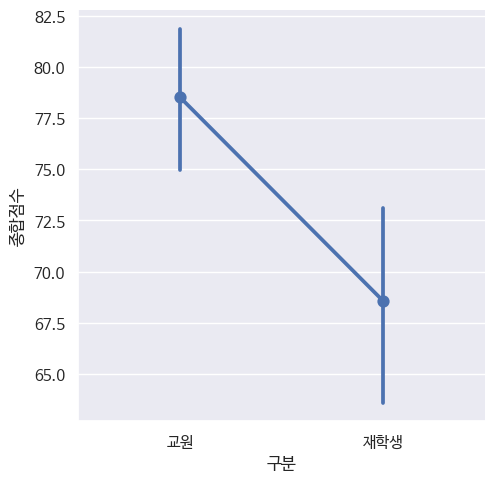

In [12]:
# 그래프
sns.catplot(x = "구분",
            y = "종합점수",
            kind = "point",
            data = ist_df)
plt.show()

## 5.등분산 검정

### 5.1 등분산 검정

In [13]:
# 등분산이면 지금까지 분석한 것이 문제 없음
pg.homoscedasticity(ist_df,
                    dv = "종합점수",
                    group = "구분")

,W,pval,equal_var
levene,0.216827,0.642501,True


### 5.2 이분산일때(Welch's test)

In [14]:
# paired = True : paired sample t-test
# correction = True : 이분산일때
pg.ttest(x, y,
         paired = False,
         alternative = "two-sided",
         correction = True).round(3) # 이분산일때

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.249,89.194,two-sided,0.002,"[-16.05, -3.87]",0.65,19.902,0.896


## 6.정규성 검정

### 6.1 정규분포 검정

In [15]:
pg.normality(ist_df,
             dv = '종합점수',
             group = '구분')

,W,pval,normal
구분,,,
재학생,0.820163,0.000003,False
교원,0.961662,0.104363,True


### 6.2 비모수일때

In [16]:
# Mann-Whitney U test
pg.mwu(x, y,
       alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,766.0,two-sided,0.000854,0.3872,0.3064


### 6.3 이상치제거(필요시)

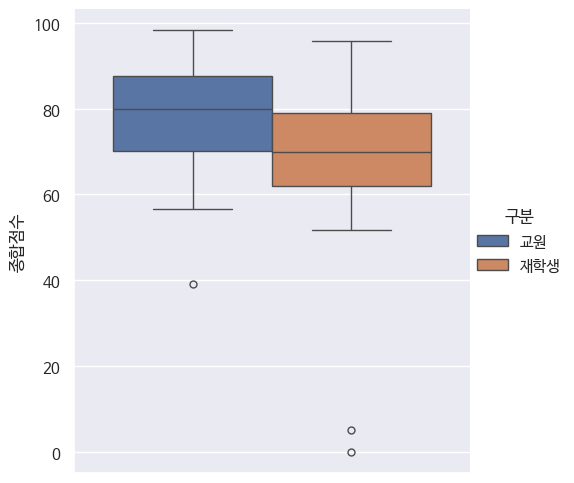

In [17]:
# 한글 폰트 인식
sns.catplot(data = ist_df,
            y = ist_df["종합점수"],
            hue = ist_df["구분"],
            kind = "box")
plt.show()

## 7.검증결과 그래프

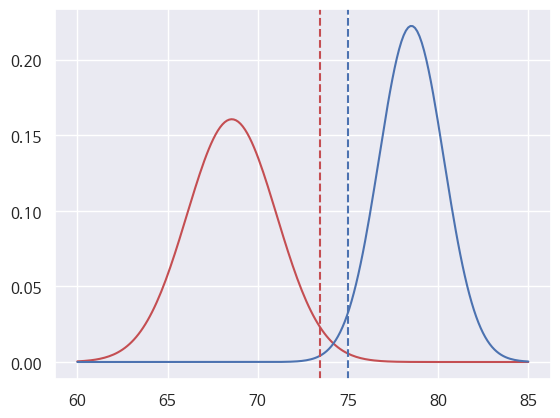

In [23]:
from scipy.stats import norm # 정규분포

x_data = np.linspace(60, 85, 200)

se1 = 17.57/np.sqrt(50) # 표준오차(표준편차/sqrt(n)))
se2 = 12.69/np.sqrt(50) # 표준오차(표준편차/sqrt(n)))

plt.plot(x_data, norm.pdf(x_data, loc = 68.56, scale = se1), 'r-')
plt.plot(x_data, norm.pdf(x_data, loc = 78.52, scale = se2), 'b-')
plt.axvline(x = 68.56+1.96 * se1, color='r', linestyle='--')
plt.axvline(x = 78.52-1.96 * se2, color='b', linestyle='--')
plt.show()